In [30]:
import numpy as np
import pandas as pd
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [14]:
def get_dim(Im):
    """Takes an image as an input and gives dimensions for pixels (width and height)"""
    width, height = Image.open(Im).size
    return (width,height)

In [15]:
def get_xy(Im):
    """Take an image and return all possible x,y coordinate combinations"""
    width, height = Image.open(Im).size
    return list(product(np.arange(width),np.arange(height)))

In [16]:
def get_rgb(Im):
    """Take an image and return rgb values for every pixel"""
    im = Image.open(Im) 
    pix = im.load()
    rgb = [pix[i,j] for i,j in get_xy(Im)]
    return rgb

In [17]:
def get_data(Im):
    """Take an image and extract all the coordinates and RGB values of each pixel. Returns a data frame 
    containing that information"""
    img_data = list(zip(get_xy(Im),get_rgb(Im)))
    df = []
    for i in img_data:
        columns = {'x':i[0][0],'y':i[0][1],'R':i[1][0],'G':i[1][1],'B':i[1][2]}
        df.append(columns)
    return pd.DataFrame(df)

In [18]:
get_data('AQUA.png')

,x,y,R,G,B
0,0,0,96,198,191
1,0,1,87,194,187
2,0,2,78,185,180
3,0,3,73,183,182
4,0,4,69,183,184
...,...,...,...,...,...
562495,749,745,0,163,160
562496,749,746,0,163,160
562497,749,747,1,164,161
562498,749,748,1,164,162


In [19]:
def resize(Im,size,name):
    """Take an image and resize it. Takes the original Image Im as input, and resizes to the size specified and 
    outputs a new image with name chosen"""
    image = Image.open(Im)
    new_image = image.resize(size)
    new_image.save(name)

In [20]:
def plotter(Im, axis = None, title = None):
    """Take an image and get density plot for rgb values"""
    df = get_data(Im) 
    df = df.iloc[:,2:]
    palt = {'R':'red','G':'green','B':'blue'}
    df = df.melt(value_vars = ['R','G','B'])
    df.columns.values[0] = 'RGB'
    sns.kdeplot(data = df, hue = 'RGB', x = 'value', palette = palt, ax = axis).set(title = title)

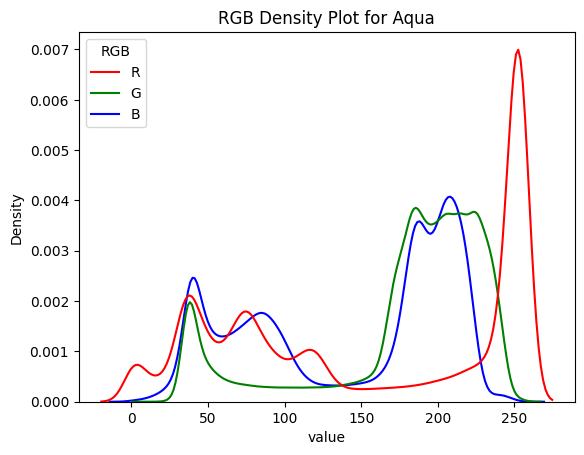

In [24]:
plotter('AQUA.png', title = 'RGB Density Plot for Aqua')

For the aqua shot Marilyn, we can see that the largest amount of red pixels are at the value of 255 (8.52% specifically). There is a large proportion of red pixels in the value range of 249-255 making up 31.33% of the red pixels. There are a couple value areas that the red pixels like to cluster around, such as the local maximums at values in the 30s and 70s. For the green pixels, the majority of them are clustered around the values around 170-230. For the blue pixels, there are two areas where they seem to cluster around. The larger area is around the values of 180-215 and the second cluster is near the values in the 30s.

In [25]:
df = get_data('AQUA.png')

In [26]:
df = df.iloc[:,2:]
df

,R,G,B
0,96,198,191
1,87,194,187
2,78,185,180
3,73,183,182
4,69,183,184
...,...,...,...
562495,0,163,160
562496,0,163,160
562497,1,164,161
562498,1,164,162


In [27]:
print(df['R'].value_counts(normalize = True).head(n = 50))

R
255    0.085164
253    0.059511
254    0.056434
252    0.054304
251    0.037337
250    0.020533
249    0.012683
35     0.012619
36     0.011470
34     0.010985
0      0.010377
37     0.009618
248    0.009268
247    0.008068
38     0.007801
246    0.007422
1      0.007285
33     0.007182
75     0.006946
245    0.006917
76     0.006828
78     0.006699
79     0.006686
39     0.006676
244    0.006631
74     0.006444
40     0.006350
72     0.006260
77     0.006229
41     0.006146
73     0.006121
243    0.006046
71     0.005927
70     0.005639
42     0.005639
69     0.005609
80     0.005474
43     0.005294
242    0.005143
44     0.005056
241    0.004722
45     0.004702
68     0.004670
32     0.004562
2      0.004546
46     0.004498
47     0.004492
81     0.004475
240    0.004363
118    0.004286
Name: proportion, dtype: float64


In [77]:
# take the sum of the proportion of red pixels in the value range of 249-255
sum(df['R'].value_counts(normalize = True).values[0:6])

0.3132835555555556

In [55]:
df['G'].value_counts(normalize = True).head(n=50)

G
225    0.018151
215    0.014537
216    0.014023
206    0.013652
184    0.013481
183    0.013314
207    0.013090
226    0.012951
185    0.012898
186    0.012775
222    0.012542
217    0.012396
205    0.012135
182    0.011972
214    0.011596
187    0.011456
181    0.011300
202    0.011250
224    0.011070
197    0.011028
199    0.010999
189    0.010962
221    0.010930
201    0.010873
198    0.010800
188    0.010725
190    0.010709
191    0.010679
193    0.010594
208    0.010588
223    0.010581
192    0.010498
211    0.010489
210    0.010487
234    0.010450
37     0.010412
200    0.010295
212    0.010292
36     0.010251
194    0.010160
204    0.010140
230    0.010124
231    0.010011
229    0.009995
203    0.009948
235    0.009929
209    0.009916
195    0.009815
196    0.009742
233    0.009710
Name: proportion, dtype: float64

In [54]:
print(df['B'].value_counts(normalize = True).head(n = 50))

B
212    0.014121
206    0.013723
207    0.013698
208    0.013646
186    0.013353
209    0.013035
205    0.012526
187    0.012516
188    0.012412
204    0.012407
185    0.012228
215    0.011957
39     0.011954
202    0.011826
38     0.011817
210    0.011813
203    0.011653
201    0.011554
214    0.011426
183    0.011371
189    0.011308
184    0.011220
200    0.011028
213    0.010887
217    0.010885
216    0.010715
40     0.010665
211    0.010480
182    0.010396
190    0.010370
218    0.010311
191    0.010167
199    0.010117
192    0.010066
219    0.009676
220    0.009616
193    0.009552
37     0.009227
41     0.009118
181    0.009056
198    0.009024
194    0.008852
195    0.008612
196    0.008517
42     0.008210
197    0.008185
224    0.007922
180    0.007916
221    0.007388
179    0.007136
Name: proportion, dtype: float64


In [31]:
df = get_data('AQUA.png')
dfn = df.iloc[:,2:].copy()
for i in range(3):
    dfn.iloc[:,i] = (dfn.iloc[:,i]-dfn.iloc[:,i].mean())/dfn.iloc[:,i].std()
kmeans = KMeans(n_clusters=9)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_
df

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,x,y,R,G,B,Cluster
0,0,0,96,198,191,4
1,0,1,87,194,187,4
2,0,2,78,185,180,4
3,0,3,73,183,182,4
4,0,4,69,183,184,4
...,...,...,...,...,...,...
562495,749,745,0,163,160,1
562496,749,746,0,163,160,1
562497,749,747,1,164,161,1
562498,749,748,1,164,162,1


In [43]:
df = get_data('AQUA.png')
dfn = df.iloc[:,2:].copy()
for i in range(3):
    dfn.iloc[:,i] = (dfn.iloc[:,i]-dfn.iloc[:,i].mean())/dfn.iloc[:,i].std()
kmeans = KMeans(n_clusters=9)
kmeans_result = kmeans.fit(np.asarray(dfn))
df['Cluster'] = kmeans_result.labels_
df
def inspect(cluster):
    """This function is dependent on the code block above. View all the pixels in a specific cluster
    derived from k-means"""
    ind = df.loc[df['Cluster'] != cluster,['x','y']]
    im = Image.open('AQUA.png')
    pix = im.load()
    for i,j in zip(list(ind['x']),list(ind['y'])):
        pix[i,j] = (255,255,255)
    return im

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
clusters = [inspect(i) for i in range(9)]

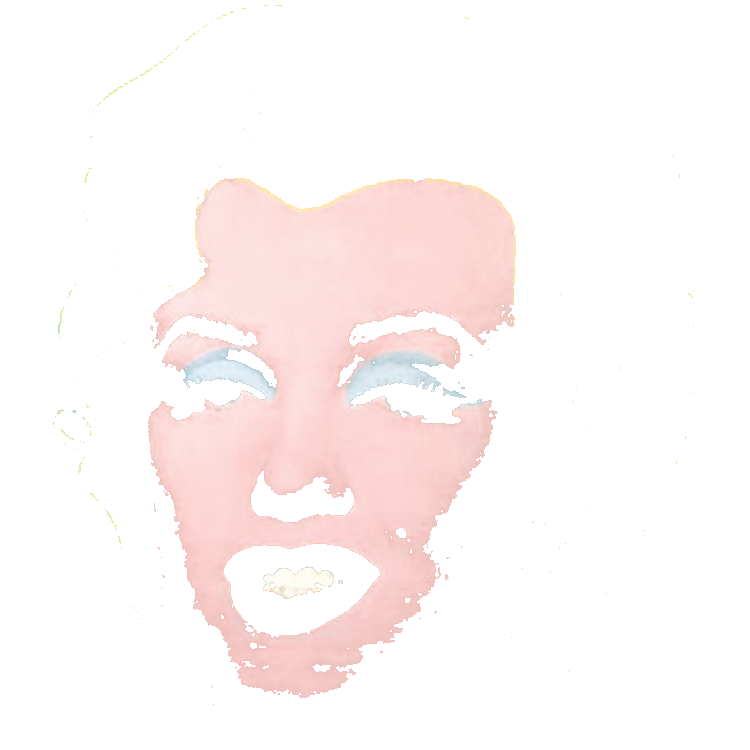

In [45]:
clusters[0]

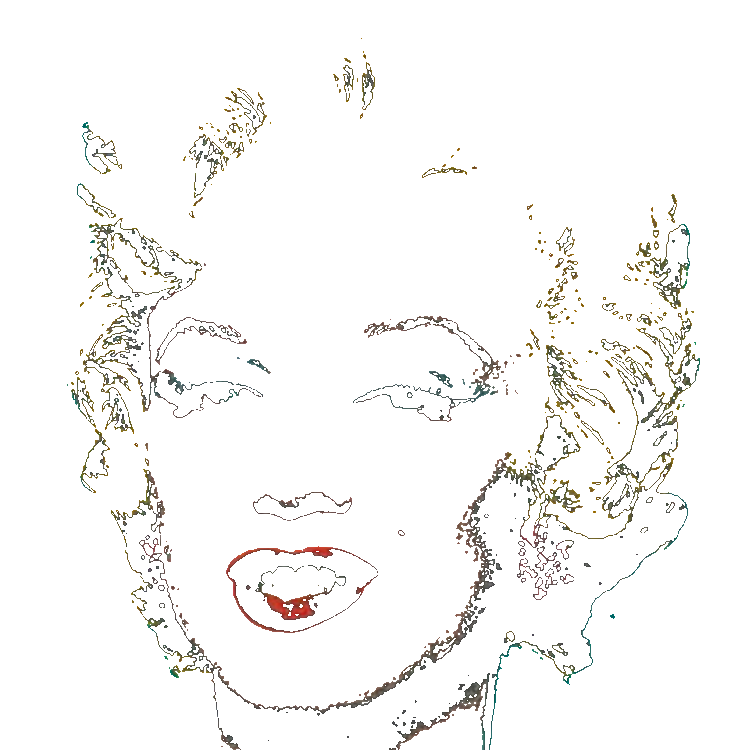

In [46]:
clusters[1]

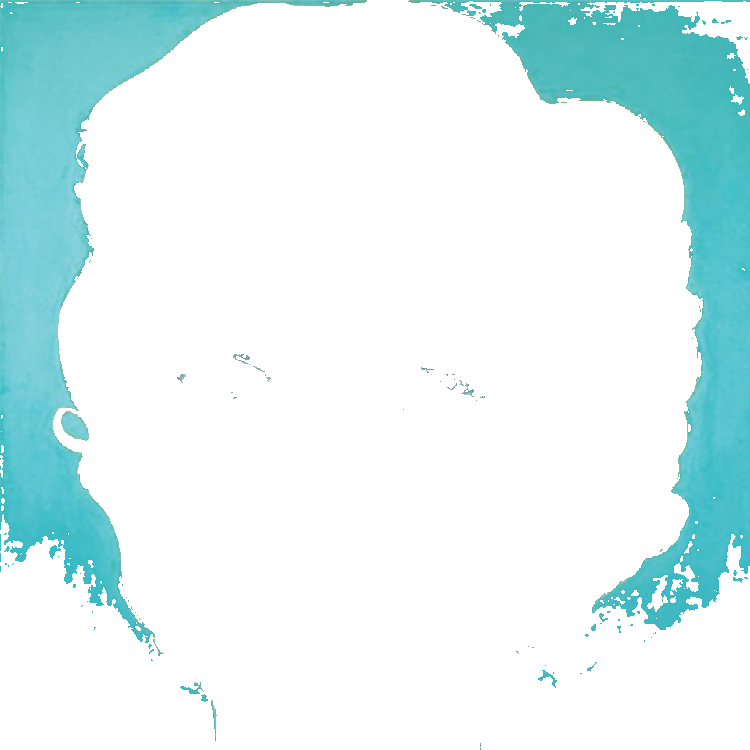

In [47]:
clusters[2]

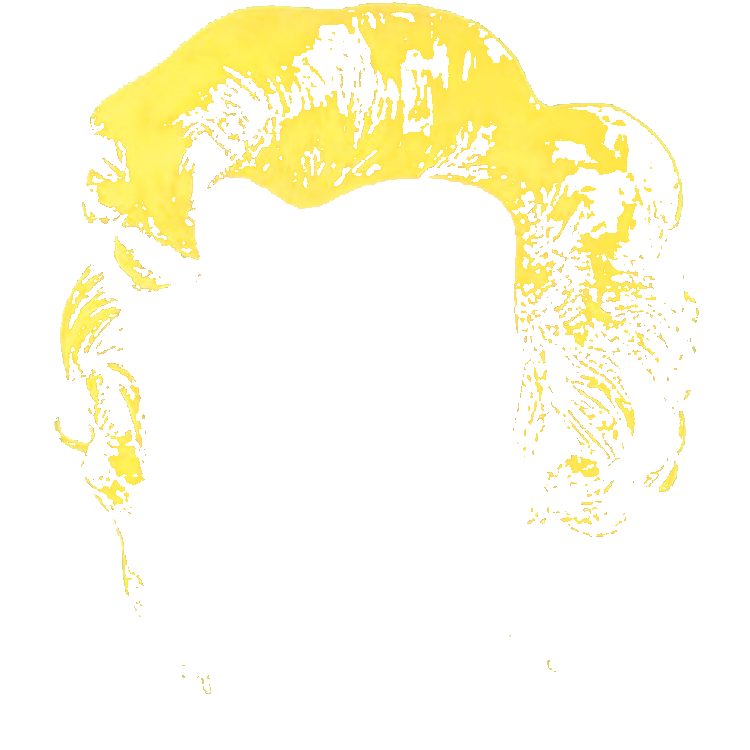

In [48]:
clusters[3]

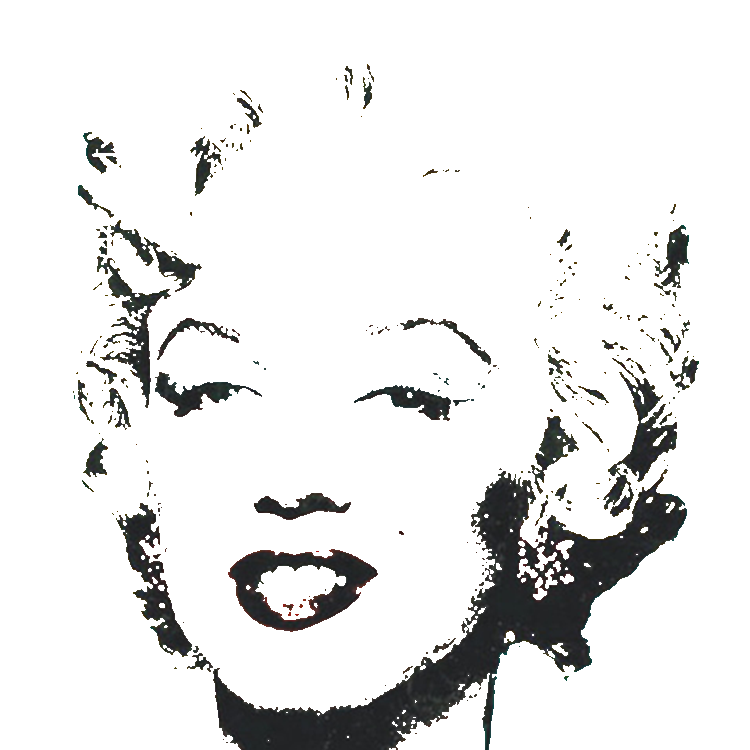

In [49]:
clusters[4]

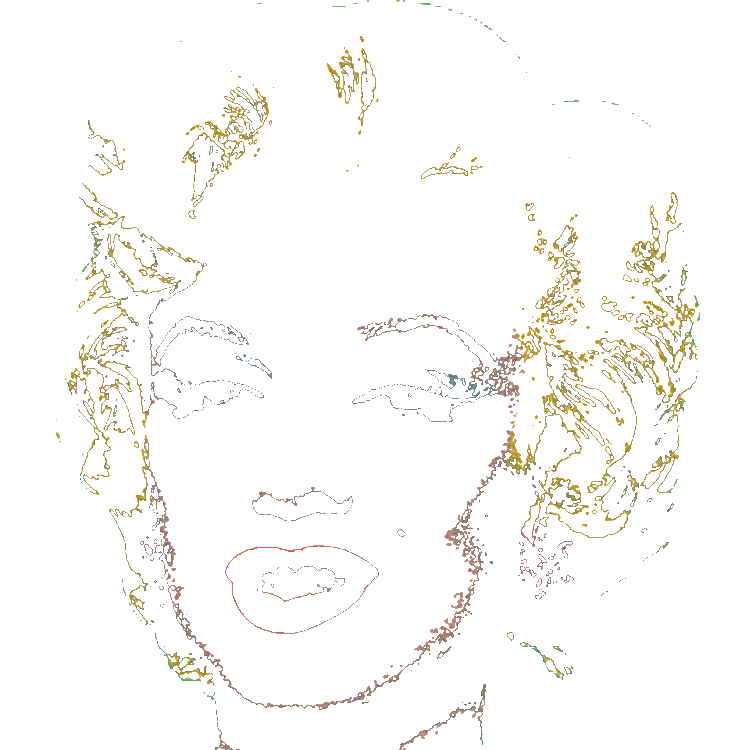

In [50]:
clusters[5]

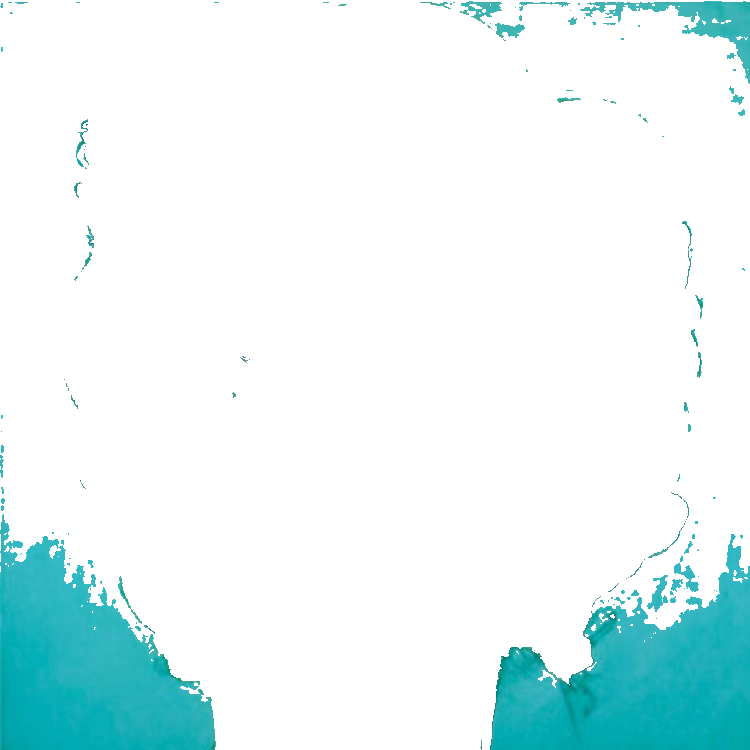

In [51]:
clusters[6]

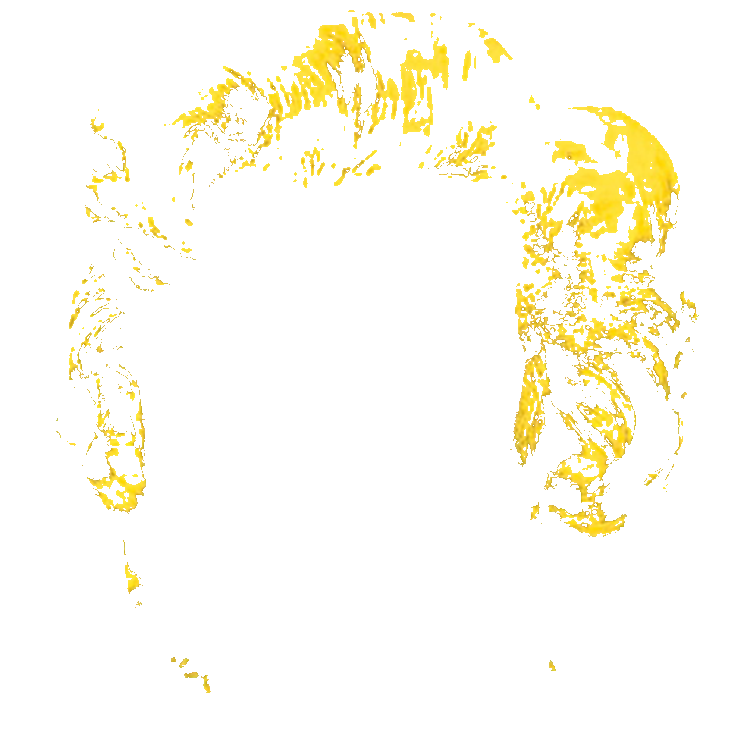

In [52]:
clusters[7]

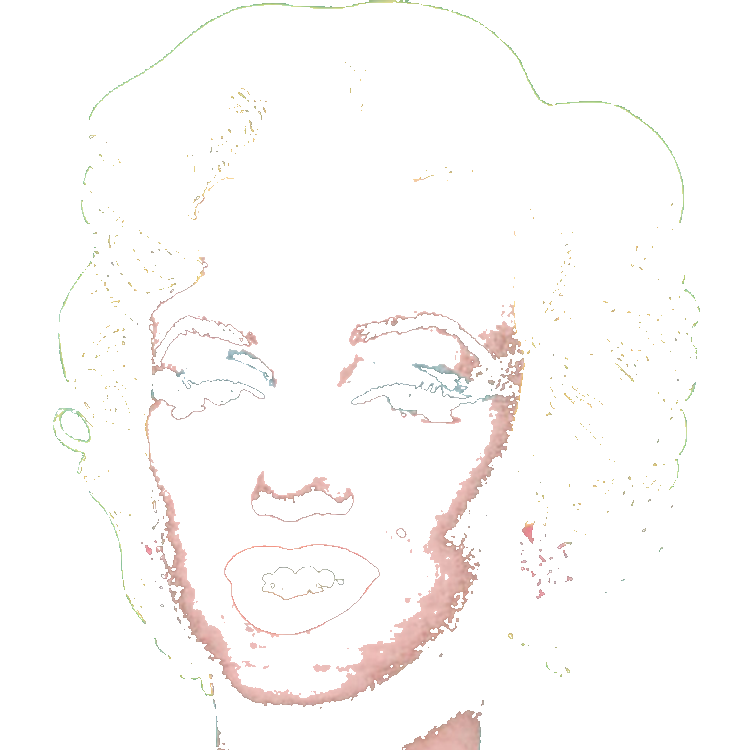

In [53]:
clusters[8]